# LMAPR1492 - Pics du diffractogramme

### Import

In [1]:
# Import
from pymatgen import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.ext.matproj import MPRester as mp
from pymatgen.io.cif import CifWriter
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.analysis.diffraction.xrd import *
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np

# User APE key
USER_API_KEY = "smdQ36uJeil4SE7H"

### Téléchargement de la structure et du fichier

In [2]:
# Download structure
structure = mp(USER_API_KEY).get_structure_by_material_id("mp-22473")

# Download file
file_writer = CifWriter(structure, 0.1)
file_writer.write_file('NaInSe2-mp-22473.cif')

### Structure conventionnelle

In [3]:
# Visualize conventional structure
conventional_structure = SpacegroupAnalyzer(structure).get_conventional_standard_structure()
view = quick_view(conventional_structure, "packed")
display(view)

JsmolView(layout=Layout(align_self='stretch', height='400px'))

### Calcul des pics

Calcul des trois premiers pics du diffractogramme correspondant au matériau pour un rayonnement $X$ incident $CuK\alpha$ de longueur d’onde $\lambda=1.54060 \AA$.

In [4]:
# Use pymatgen xrd module
XRD = XRDCalculator(wavelength='CuKa', symprec=0.001)
XRD_pattern = XRD.get_pattern(structure, scaled=True)

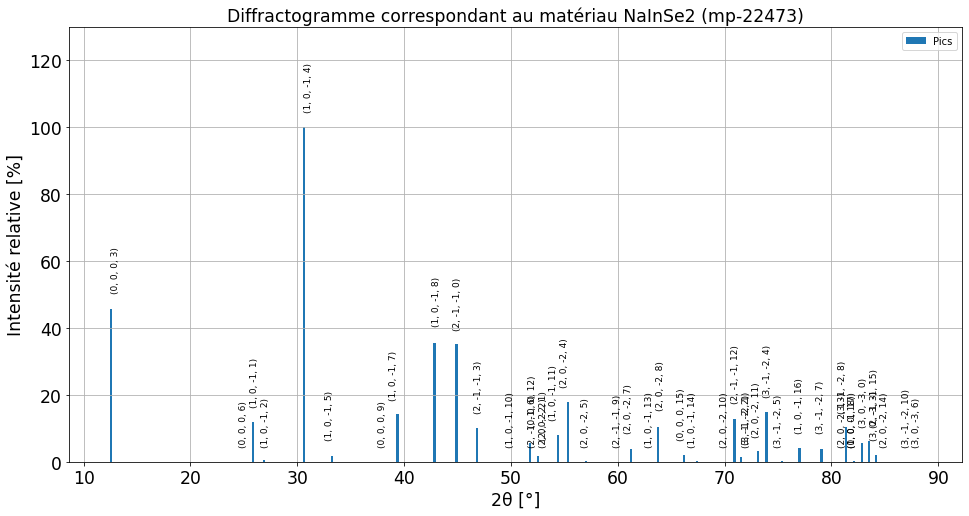

In [5]:
# Get values
two_theta = XRD_pattern.x
intensity = XRD_pattern.y
hkls = XRD_pattern.hkls

# Set parameters for the plot
params = {#'legend.fontsize': 'xx-large',
          'figure.figsize': (16, 8),
          'axes.labelsize': 'xx-large',
          'axes.titlesize':'xx-large',
          'xtick.labelsize':'xx-large',
          'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

# Create figure and axis
fig, ax = plt.subplots()
plt.ylim(0, 130)

# Set title and grid
plt.title("Diffractogramme correspondant au matériau NaInSe2 (mp-22473)")
plt.grid(True)

# Add peaks
ax.bar(two_theta,intensity,width=0.2, label="Pics")

# Add text
for i in range(0, len(two_theta)):
    x = np.round(two_theta[i], 0)
    y = np.round(intensity[i], 0)
    z = hkls[i][0]["hkl"]
    text = str(z)
    ax.text(x, y+5, text, fontsize=9, horizontalalignment='center', color="black", alpha=1, rotation=90)

# Set labels
plt.xlabel("2θ [°]")
plt.ylabel("Intensité relative [%]")
plt.legend()
plt.show()

### Commentaires des résultats

Nous avons appris en cours que l'intensité relative d'un du diffractogramme pouvait être calculé avec la formule: $$S_K = S_{hkl} = \sum_{j=1}^{n} f_{j} \exp(i K \cdot \phi_{j})$$
* $f_{j}$ est un coefficient propre à l'atome considéré
* $K$ est un vecteur défini par $K=h a^{*} + k b^{*} + l c^{*}$
* $\phi_{j}$ est un vecteur représentant la position des atomes dans la maille conventionnelle

Nous avons donc besoin des vecteurs directs, réciproques et des positions des atomes dans la maille conventionnelle.

#### Vecteurs directs

In [6]:
# Get direct vectors
direct_vectors = structure.lattice
print("The direct vectors are (in an orthonormal reference system) :")
print(direct_vectors)

direct_v = np.array([[7.157599,-2.018636,0.000000], [7.157599,2.018636,0.000000], [6.588290,0.000000,3.449718]])

The direct vectors are (in an orthonormal reference system) :
7.157599 -2.018636 0.000000
7.157599 2.018636 0.000000
6.588290 0.000000 3.449718


#### Vecteurs réciproques

In [7]:
# Get reciprocal vectors
reciprocal_vectors = structure.lattice.reciprocal_lattice
print("The reciprocal vectors are (in an orthonormal reference system) :")
print(reciprocal_vectors)

reciprocal_v = np.array([[0.438917,-1.556295,-0.838246], [0.438917,1.556295,-0.838246], [0.000000,0.000000,1.821362]])

The reciprocal vectors are (in an orthonormal reference system) :
0.438917 -1.556295 -0.838246
0.438917 1.556295 -0.838246
0.000000 0.000000 1.821362


#### Position des atomes dans la maille conventionnelle

En utilisant le logiciel VESTA, on peut trouver les positions des atomes dans la maille conventionnelle en fonction des vecteurs du réseau direct) :

| Indice &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | Atome &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | Numéro &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | x &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | y &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | z &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |
| :---   | :--- | :---    | :---    | :---    | :---    |
| 1 | Na | Na0  | 0.33333 | 0.66667 | 0.16667 |
| 2 | Na | Na1  | 1.00000 | 1.00000 | 0.50000 |
| 3 | Na | Na2  | 0.66667 | 0.33333 | 0.83333 |
| 4 | In | In3  | 0.00000 | 0.00000 | 0.00000 |
| 5 | In | In4  | 0.66667 | 0.33333 | 0.33333 |
| 6 | In | In5  | 0.33333 | 0.66667 | 0.66667 |
| 7 | Se | Se6  | 0.66667 | 0.33333 | 0.07365 |
| 8 | Se | Se7  | 0.00000 | 0.00000 | 0.25968 |
| 9 | Se | Se8  | 0.33333 | 0.66667 | 0.40699 |
| 10 | Se | Se9  | 0.66667 | 0.33333 | 0.59301 |
| 11 | Se | Se10  | 0.00000 | 0.00000 | 0.74032 |
| 12 | Se | Se11  | 0.33333 | 0.66667 | 0.92635 |

In [8]:
# Set parameters
atoms = ["Na", "Na", "Na", "In", "In", "In", "Se", "Se", "Se", "Se", "Se", "Se"]
f = {"Na": 1.0, "In": 1.0, "Se": 1.0}
list_xyz = [[0.33333,0.66667,0.16667],[1.00000,1.00000,0.50000],[0.66667,0.33333,0.83333],[0.00000,0.00000,0.00000],[0.66667,0.33333,0.33333],[0.33333,0.66667,0.66667],[0.66667,0.33333,0.07365],[0.00000,0.00000,0.25968],[0.33333,0.66667,0.40699],[0.66667,0.33333,0.59301],[0.00000,0.00000,0.74032],[0.33333,0.66667,0.92635]]

In [9]:
# Compute position function (direct reference system)
def compute_position(n, list_xyz, direct_v):
    phi = []
    for i in range(0, n):
        x = list_xyz[i][0]
        y = list_xyz[i][1]
        z = list_xyz[i][2]
        position = x*direct_v[0] + y*direct_v[1] + z*direct_v[2]
        phi.append(position)
    phi = np.array(phi)
    return phi

# Compute peak function
def compute_peak(n, atoms, f, phi, reciprocal_v, h, k, l):
    s = 0
    K = h*reciprocal_v[0] + k*reciprocal_v[1] + l*reciprocal_v[2]
    for i in range(0, n):
        s = s + f[atoms[i]]*np.exp(1j*np.dot(K,phi[i]))
    return np.round(s, 2)

In [10]:
phi = compute_position(12, list_xyz, direct_v)
peak = compute_peak(12, atoms, f, phi, reciprocal_v, 0, 0, 0)
print("Valeur du pic :", peak)
#print(two_theta)

Valeur du pic : (12+0j)


### Conclusion

Pour mieux comprendre la matière, j'ai essayé de coder un programme permettant de calculer la valeur du pic.
Pour moi, les trois premiers pics sont $(0,0,0,3)$ pour $2\theta=12.53°$, $(1,0,-1,1)$ pour $2\theta=25.83°$ et $(1,0,-1,4)$ pour $2\theta=30.63°$